#**PROJECT MODULE 4: UNSUPERVISED LEARNING** 

##**PHASE 0: DATASET ANALYSIS**

In [25]:
# import some libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# seaborn is a layer on top of matplotlib which has additional visualizations -
# just importing it changes the look of the standard matplotlib plots.
# the current version also shows some warnings which we'll disable.
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

# show plots inline
%matplotlib inline

**Get Data**

In [26]:
# get data and show some records

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])


#data = data.drop('Id', axis=1) # get rid of the Id column - don't need it
data.sample(5)

,sepal length,sepal width,petal length,petal width,target
60,5.0,2.0,3.5,1.0,Iris-versicolor
12,4.8,3.0,1.4,0.1,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
137,6.4,3.1,5.5,1.8,Iris-virginica
113,5.7,2.5,5.0,2.0,Iris-virginica


In [27]:
# split data into features (X) and labels (y)
X = data.iloc[:,0:4]
y = data.iloc[:,-1]

print("\n Features \n")
print(X.sample(5))
print("\n Target \n")
print(y.sample(5))


 Features 

     sepal length  sepal width  petal length  petal width
147           6.5          3.0           5.2          2.0
100           6.3          3.3           6.0          2.5
112           6.8          3.0           5.5          2.1
86            6.7          3.1           4.7          1.5
55            5.7          2.8           4.5          1.3

 Target 

40         Iris-setosa
31         Iris-setosa
72     Iris-versicolor
105     Iris-virginica
111     Iris-virginica
Name: target, dtype: object


**Visualize Data**

In [28]:
data["target"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

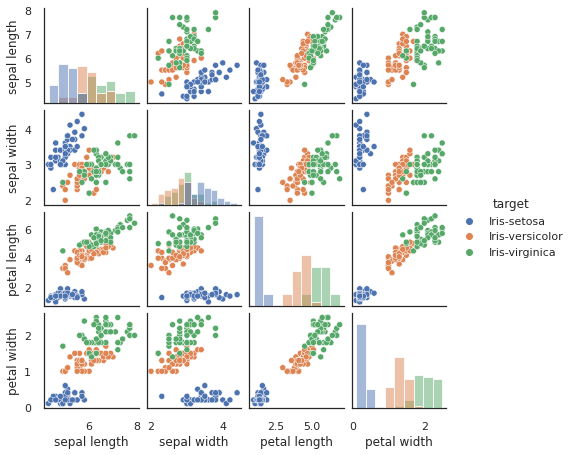

In [29]:
sns.pairplot(data, hue="target", diag_kind="hist", size=1.6);

Versicolor and Virginica are very similar, it will be very difficult to generate a clustering algorithm that can separate them, but let's try!

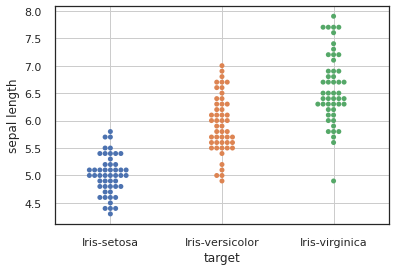

In [30]:
sns.swarmplot(x="target", y="sepal length", data=data)
plt.grid()

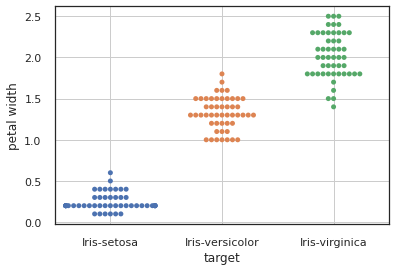

In [31]:
sns.swarmplot(x="target", y="petal width", data=data)
plt.grid()

## **PHASE 1: APPLICATION OF SCALING ALGORITHMS**

**Feature Scaling**

The data is unbalanced. For example Sepal Lenght is about 4 times larger than Petal Width, so I recommend scaling the values, otherwise the larger features will dominate the others in the grouping, etc.

In [32]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

#INSERT HERE THE MISSING LINES TO GENERATE A DATASET WITH THE SCALED CHARACTERISTICS


X_scaled_array = scaler.fit_transform(X)

# GENERATE A VECTOR WITH THE SCALED X VALUES CALLED X_scaled_array
# IN THE OUTPUT YOU CAN SEE WHAT THE DATAFRAME SHOULD LOOK LIKE

X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(10)

,sepal length,sepal width,petal length,petal width
97,0.432165,-0.356361,0.307833,0.133226
116,0.795669,-0.124958,0.990221,0.790591
149,0.068662,-0.124958,0.762759,0.790591
57,-1.143017,-1.513375,-0.260824,-0.261193
117,2.249683,1.726266,1.672610,1.316483
143,1.159173,0.337848,1.217684,1.447956
18,-0.173674,1.726266,-1.170675,-1.181504
65,1.038005,0.106445,0.364699,0.264699
25,-1.021849,-0.124958,-1.227541,-1.312977
127,0.310998,-0.124958,0.649027,0.790591


## **PHASE 2: APPLICATION OF CLUSTERING ALGORITHMS**

###**PHASE 2.1: K-MEANS**

**Silhouette score & Elbow Method**

A value close to +1 indicates that the sample is far from the neighboring clusters. A value of 0 indicates that the sample is at or very close to the decision boundary between two neighboring clusters, and negative values indicate that these samples may have been assigned to the wrong cluster.

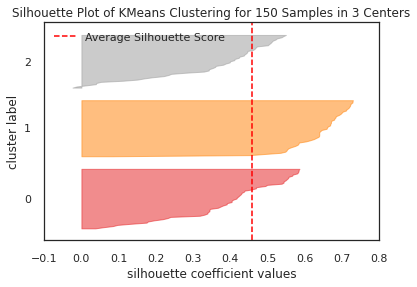

In [33]:
# Instantiate the clustering model and visualizer 
#pip install yellowbrick

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

nclusters = 3
seed = 0

model = KMeans(n_clusters=nclusters
            , init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/show the data

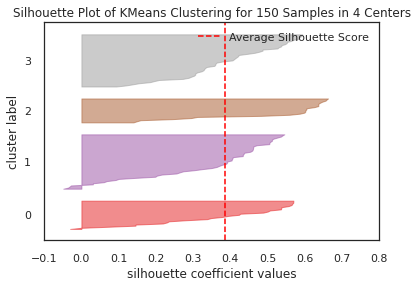

In [34]:
# Instantiate the clustering model and visualizer 
#pip install yellowbrick


from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

nclusters = 4
seed = 0

model = KMeans(n_clusters=nclusters
            , init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/show the data

It can be observed that with 3 clusters an average silhouette score of 0.47 is obtained and with 4 clusters a score of 0.39 approximately, therefore it is recommended to train a clustering model with 3 clusters.

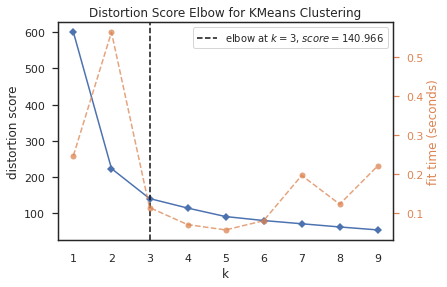

In [35]:
#from sklearn import datasets
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer

seed = 0

km = KMeans(init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = KElbowVisualizer(km, k=(1,10))
 
visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()               # Finalize and render the figure


We note by the ELBOW method that we have to use a K=3 i.e. 3 clusters.

**K-Means**

Try clustering the data in 4D and see if you can reproduce the actual clusters. That is, imagine we don't have the species labels in this data and we want to divide the flowers into species. you could set up an arbitrary number of clusters and try to divide them into similar groups. We know there are 3 species, so let's find 3 species and see if the predictions for each point match the label in and, on the other hand we know that by the silhouette and elbow method, the recommended number of clusters is *3*.

In [36]:
from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

#DEVELOP KMeans METHOD HERE using the KMeans library.
#Complete here, calling the K-means method to train the model using the ncluster and seed variables.
#use X_Scaled to train the model
km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)


print("\n Features \n")
print(X_scaled)

print("\n\n\n Clusters \n")
print(y_cluster_kmeans)


 Features 

     sepal length  sepal width  petal length  petal width
0       -0.900681     1.032057     -1.341272    -1.312977
1       -1.143017    -0.124958     -1.341272    -1.312977
2       -1.385353     0.337848     -1.398138    -1.312977
3       -1.506521     0.106445     -1.284407    -1.312977
4       -1.021849     1.263460     -1.341272    -1.312977
..            ...          ...           ...          ...
145      1.038005    -0.124958      0.819624     1.447956
146      0.553333    -1.281972      0.705893     0.922064
147      0.795669    -0.124958      0.819624     1.053537
148      0.432165     0.800654      0.933356     1.447956
149      0.068662    -0.124958      0.762759     0.790591

[150 rows x 4 columns]



 Clusters 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 

### **PHASE 2.1: DBSCAN**

In [37]:
from sklearn.cluster import DBSCAN
epsilon = 0.5
samples = 10

# Training the model
db= DBSCAN(eps=epsilon, min_samples=samples)
db.fit(X_scaled)

# Predict the cluster for each point
y_cluster_db = db.fit_predict(X_scaled)

print("\n\n\n Clusters \n")
print(y_cluster_db)




 Clusters 

[ 0  0  0  0  0 -1  0  0 -1  0 -1  0  0 -1 -1 -1 -1  0 -1  0  0  0 -1  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0
  0  0 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1 -1  1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1  1
  1 -1 -1  1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1  2 -1 -1  2 -1 -1 -1 -1
  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2  2  2 -1  2
  2  2 -1 -1 -1 -1]


After trying several combinations of the "eps" and "min_samples" parameters, I have come to the conclusion that this algorithm is not the right one for our Dataset. It returns many -1 values (noise), which means that there are many values not included in any of the 3 clusters formed.

### **PHASE 2.2: AGGLOMERATIVE HIERARCHICAL CLUSTERING**

In [38]:
from sklearn.cluster import AgglomerativeClustering

k = 3

# Training the model
hier= AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
hier.fit(X_scaled)

# Predict the cluster for each point
y_cluster_hier = db.fit_predict(X_scaled)

print("\n\n\n Clusters \n")
print(y_cluster_hier)





 Clusters 

[ 0  0  0  0  0 -1  0  0 -1  0 -1  0  0 -1 -1 -1 -1  0 -1  0  0  0 -1  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0
  0  0 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1 -1  1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1  1
  1 -1 -1  1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1  2 -1 -1  2 -1 -1 -1 -1
  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2  2  2 -1  2
  2  2 -1 -1 -1 -1]


For the same value of clusters (k=3) as in the model tested with the K-means algorithm, we found many -1 values (noise) corresponding to objects that could not be assigned to any of the 3 clusters formed.

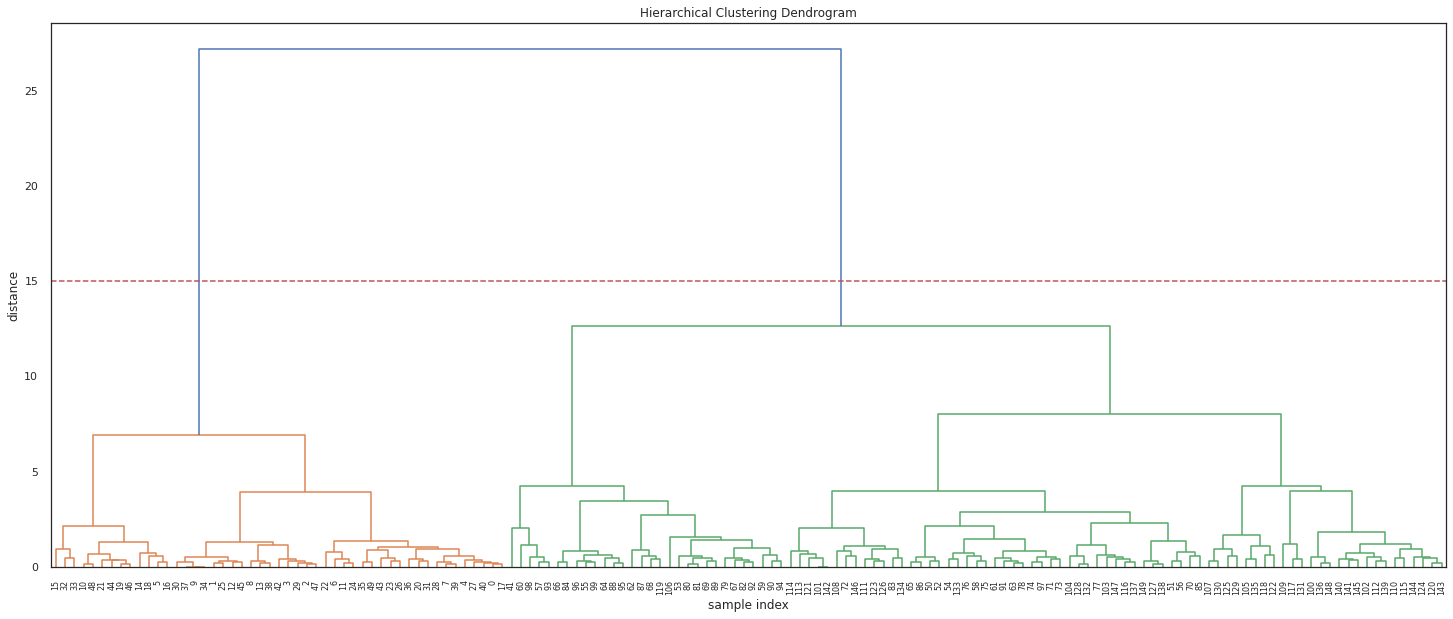

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# generate the linkage matrix
Z = linkage(X_scaled, 'ward')
c, coph_dists = cophenet(Z, pdist(X_scaled))
c
Z[:20]

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.axhline(y=15, color='r', linestyle='--')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()


The Dendogram that applying this algorithm we obtain 2 groups or Clusters, given that the red line crosses with 2 vertical lines. This does not coincide with the 3 clusters obtained by training the algorithm.

In [40]:
from sklearn.cluster import AgglomerativeClustering

k = 3

# Training the model
hier= AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
hier.fit(X_scaled)

# Predict the cluster for each point
y_cluster_hier = db.fit_predict(X_scaled)

print("\n\n\n Clusters \n")
print(y_cluster_hier)





 Clusters 

[ 0  0  0  0  0 -1  0  0 -1  0 -1  0  0 -1 -1 -1 -1  0 -1  0  0  0 -1  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0
  0  0 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1 -1  1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1  1
  1 -1 -1  1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1  2 -1 -1  2 -1 -1 -1 -1
  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2  2  2 -1  2
  2  2 -1 -1 -1 -1]


For the value of clusters (k=2) that we have obtained in the dendograms, we found many -1 values (noise) that correspond to objects that could not be assigned to any of the 3 clusters formed.

##**PHASE 3: APPLYING PCA**

**Principal Component Analysis (PCA)**

If you have many features, it may be useful to reduce some features, to avoid the curse of dimensionality (i.e., needing exponentially more data to make accurate predictions as the number of features grows). You can do this with principal component analysis (PCA), which reassigns the data to a new (smaller) coordinate system that tries to account for as much information as possible. you can also use PCA to visualize the data by reducing the # features to 2 dimensions and making a scatter plot.

In this case I recommend using PCA to visualize the data, we already trained the K-means model and we have the clusters identified, now let's transform the features from 4D to 2D to just visualize them in a graph, and observe the CLUSTERS.

In [41]:
from sklearn.decomposition import PCA

ndimensions = 2
# Apply a PCA algorithm on X_scaled, to go from 4 to 2 dimensions, 
# you can use the variable ndimension


pca = PCA(n_components=ndimensions)  
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)

X_pca = pd.DataFrame(X_pca_array, columns=['principal component 1','principal component 2']) 

print(X_pca.sample(10))
explained_variance = pca.explained_variance_ratio_
print("\n\n explained_variance")
print(explained_variance)

     principal component 1  principal component 2
104               1.867891               0.291193
62                0.551634              -1.772582
45               -2.075358              -0.691917
126               1.171905              -0.318897
82                0.236011              -0.775924
134               1.197469              -0.817168
148               1.376391               1.016362
113               1.253087              -1.167391
29               -2.268790              -0.314879
122               2.898064               0.397791


 explained_variance
[0.72770452 0.23030523]


We have new 2D coordinates for each data point. At this point, if you don't have labeled data, you can add the k-means cluster IDs to this table and make a color scatter plot. we actually have labels for the data points, but let's imagine we don't, and use the predicted labels to see what the predictions look like.

**K-MEANS**

In [42]:
finalDf = pd.concat([X_pca, data[['target']]], axis = 1)
finalDf.head()

finalDf['ClusterKmeans'] = y_cluster_kmeans
finalDf.sample(10)

,principal component 1,principal component 2,target,ClusterKmeans
37,-2.188676,-0.448629,Iris-setosa,1
23,-1.820412,0.106751,Iris-setosa,1
101,1.153190,-0.701326,Iris-virginica,0
76,1.254222,-0.082620,Iris-versicolor,2
143,2.043308,0.864685,Iris-virginica,2
9,-2.188676,-0.448629,Iris-setosa,1
89,0.275425,-1.329816,Iris-versicolor,0
24,-2.228217,0.162186,Iris-setosa,1
90,0.272335,-1.119442,Iris-versicolor,0
103,1.438685,-0.050011,Iris-virginica,2


**DBSCAN**

In [43]:
finalDf2 = pd.concat([X_pca, data[['target']]], axis = 1)
finalDf2.head()

finalDf2['ClusterDBSCAN'] = y_cluster_db
finalDf2.sample(10)

,principal component 1,principal component 2,target,ClusterDBSCAN
25,-1.957024,-0.607893,Iris-setosa,0
17,-2.190179,0.514304,Iris-setosa,0
84,0.221417,-0.280848,Iris-versicolor,-1
14,-2.192292,1.889979,Iris-setosa,-1
40,-2.286527,0.467992,Iris-setosa,0
89,0.275425,-1.329816,Iris-versicolor,-1
71,0.472370,-0.416608,Iris-versicolor,1
46,-2.381258,1.150633,Iris-setosa,0
88,0.067068,-0.212621,Iris-versicolor,1
42,-2.557834,-0.453816,Iris-setosa,0


**AGGLOMERATIVE HIERARCHICAL CLUSTERING**

In [44]:
finalDf3 = pd.concat([X_pca, data[['target']]], axis = 1)
finalDf3.head()

finalDf3['ClusterHIER'] = y_cluster_hier
finalDf3.sample(10)

,principal component 1,principal component 2,target,ClusterHIER
124,1.704241,1.014148,Iris-virginica,-1
82,0.236011,-0.775924,Iris-versicolor,1
133,1.111272,-0.295986,Iris-virginica,-1
69,0.156941,-1.303103,Iris-versicolor,-1
72,1.227988,-0.940915,Iris-versicolor,-1
144,2.001691,1.048550,Iris-virginica,2
22,-2.774170,0.489517,Iris-setosa,-1
17,-2.190179,0.514304,Iris-setosa,0
122,2.898064,0.397791,Iris-virginica,-1
108,2.001735,-0.723865,Iris-virginica,-1


**Dispersion Graph (TARGET)**

In this graph we will visualize all the points, where the axes are the main components obtained from applying PCA to the scaled dataset, and each point will be visualized painted with colors associated to the label or target, since we start from a labeled dataset.

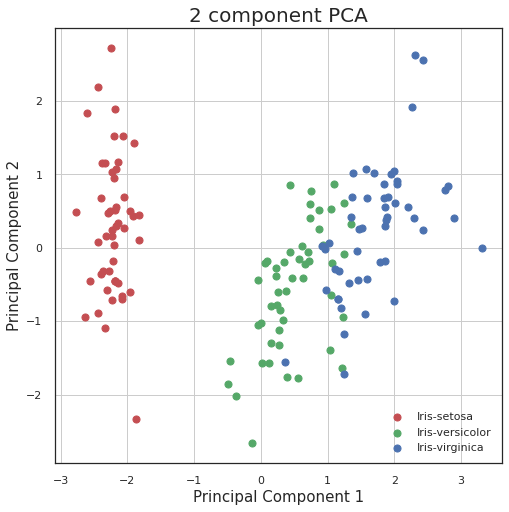

In [45]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

**Dispersion Graph (CLUSTERS)**

In this graph we will visualize all the points, where the axes are the principal components obtained from applying PCA to the scaled dataset, and each point will be visualized painted with colors associated with the CLUSTER obtained after applying K-MEANS, as can be compared with the labeled data, the clusters are VERY similar.

Such a mechanism can be used to label flowers, when we do not have the label beforehand, and can even be used to generate more specific classifications.

As we made clear from the beginning, the division between Versicolor and Virginica is very fine, and in both charts it is difficult to find a clear division.

The actual division, based on the pre-labeled data, is by a VERTICAL line down the middle of the data set, whereas according to K-means, the division is by a horizontal line through the data.

In these cases the reality differs a little from what a mathematical algorithm establishes. Surely to obtain a better division it is necessary to have more features.



**K-MEANS**

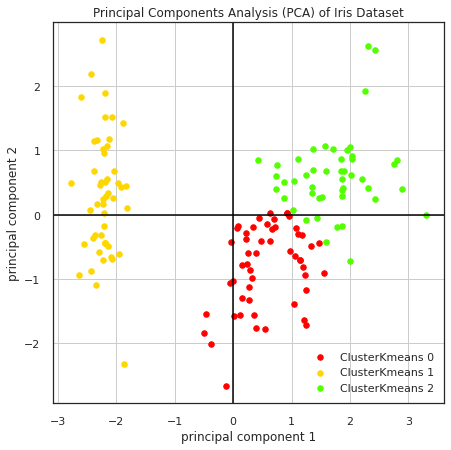

In [46]:
# so now we can make a 2d scatterplot of the clusters
# first define a plot fn

def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')

    # we can use pandas to plot each cluster on the same graph.
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'principal component 1', y = 'principal component 2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");
    
# plot the clusters each datapoint was assigned to
plotData(finalDf, 'ClusterKmeans')

**DBSCAN**

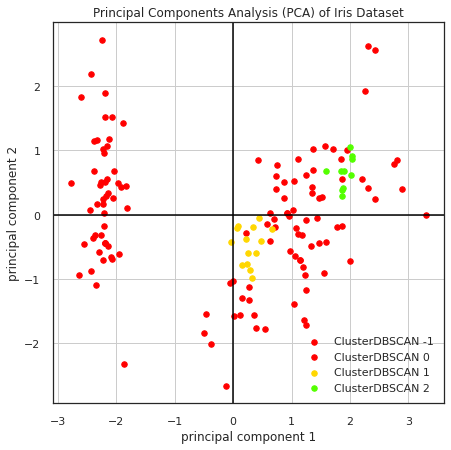

In [47]:
# so now we can make a 2d scatterplot of the clusters
# first define a plot fn

def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')

    # we can use pandas to plot each cluster on the same graph.
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'principal component 1', y = 'principal component 2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");
    
# plot the clusters each datapoint was assigned to
plotData(finalDf2, 'ClusterDBSCAN')

**AGGLOMERATIVE HIERARCHICAL CLUSTERING**

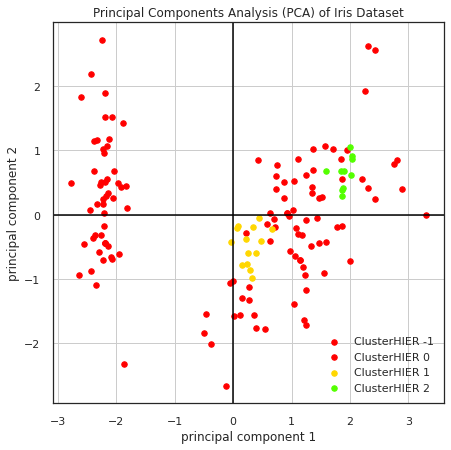

In [48]:
# so now we can make a 2d scatterplot of the clusters
# first define a plot fn

def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')

    # we can use pandas to plot each cluster on the same graph.
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'principal component 1', y = 'principal component 2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");
    
# plot the clusters each datapoint was assigned to
plotData(finalDf3, 'ClusterHIER')

##**Conclusion of the results obtained**

Analyzing the last 3 graphs, I provide the conclusions.
We have performed different groupings by means of the following clustering methods:

1. K Means: we have obtained 3 clusters and a null noise level. The definition or separation of the 3 clusters is quite clear, finding a minimum amount of scattered values in clusters where they do not belong.

2.   Density-Based Spatial Clustering of Applications with Noise (DBSCAN). The results have not been good, obtaining a large amount of noise, or values not assigned to any of the 3 clusters formed. 

3.   Agglomerative Hierarchical Clustering: As with DBSCAN, the results have been exactly the same, obtaining a large amount of unassigned values.

Based on these tests, we can affirm that for a dataset such as the one in question, K-Means is the most suitable algorithm (I repeat, among the 3 that I have used) since it has generated 3 more clearly defined clusters than the other algorithms. 





